# TASK 4

## Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
# Define the column names
cols = ['ID', 'Topic', 'Sentiment', 'Text']

url = 'https://github.com/AdithiVS/PRODIGY_DS_04/raw/main/twitterdataset.csv'
ds = pd.read_csv(url, names=cols)
print(ds.head())

     ID        Topic Sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                Text  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  


In [3]:
# Data Cleaning: Remove duplicates
ds.drop_duplicates(inplace=True)

## Sentiment Analysis: Distribution of sentiments

In [4]:
sentiment_counts = ds['Sentiment'].value_counts()
print(sentiment_counts)

Negative      21787
Positive      19811
Neutral       17800
Irrelevant    12584
Name: Sentiment, dtype: int64


## Visualization of Overall sentiment distribution

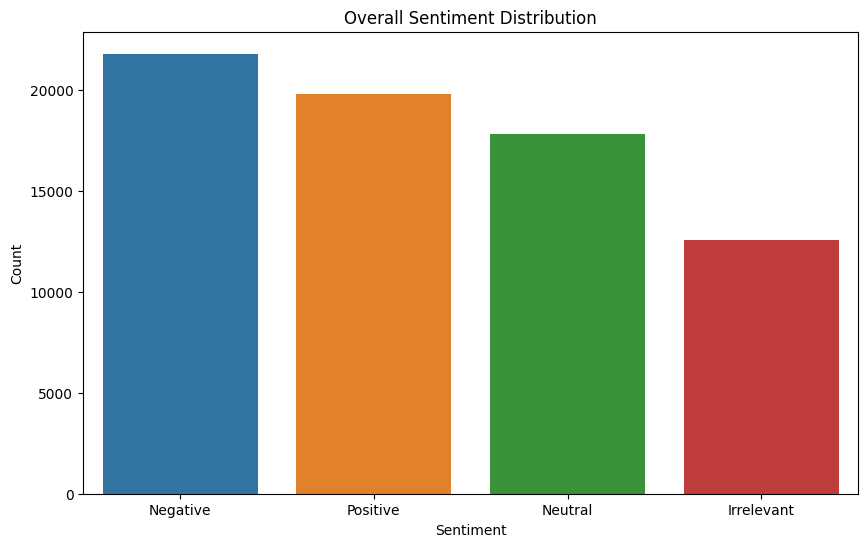

In [5]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Sentiment', data=ds, order=sentiment_counts.index)
plt.title('Overall Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

## Group by Topic and analyze sentiment distribution for each topic

In [6]:
topic_sentiment_counts = ds.groupby(['Topic', 'Sentiment']).size().unstack().fillna(0)
print(topic_sentiment_counts)


Sentiment                          Irrelevant  Negative  Neutral  Positive
Topic                                                                     
Amazon                                    187       566     1207       304
ApexLegends                               185       579      915       610
AssassinsCreed                            256       366      153      1385
Battlefield                               908       449      345       565
Borderlands                               238       415      584       974
CS-GO                                     622       337      525       723
CallOfDuty                                660       866      368       428
CallOfDutyBlackopsColdWar                 549       546      344       822
Cyberpunk2077                             462       363      458       910
Dota2                                     402       706      579       542
FIFA                                      538      1130      100       477
Facebook                 

## Visualization: Sentiment distribution for specific topics

<Figure size 1400x800 with 0 Axes>

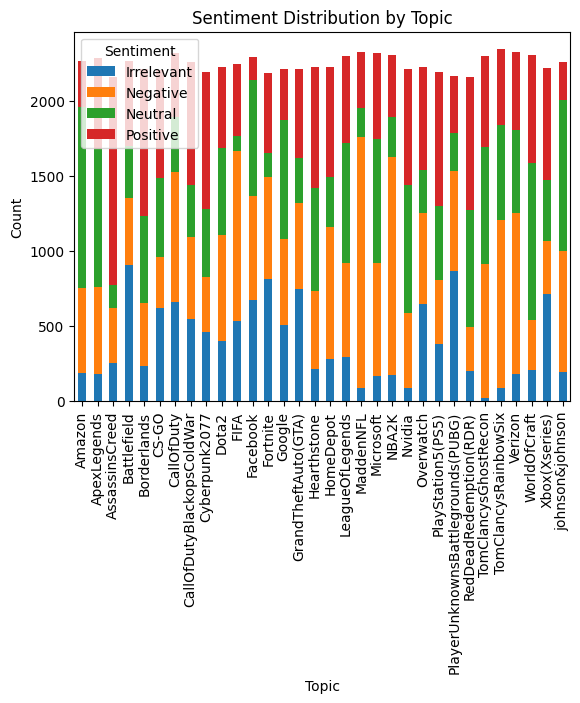

In [7]:
plt.figure(figsize=(14, 8))
topic_sentiment_counts.plot(kind='bar', stacked=True)
plt.title('Sentiment Distribution by Topic')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

In [8]:
ds['Text'] = ds['Text'].astype(str)

In [9]:
# Function to plot pie chart for sentiment distribution of a specific topic
def plot_pie_chart(topic):
    topic_data = ds[ds['Topic'] == topic]
    sentiment_counts = topic_data['Sentiment'].value_counts()
    plt.figure(figsize=(8, 8))
    plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Sentiment Distribution for {topic}')
    plt.show()

# Function to generate word cloud for a specific sentiment and topic
def generate_word_cloud(topic, sentiment):
    text = " ".join(review for review in ds[(ds['Topic'] == topic) & (ds['Sentiment'] == sentiment)]['Text'])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f'Word Cloud for {sentiment} Sentiment in {topic}')
    plt.show()

## Visualize sentiment distribution for 'Google'

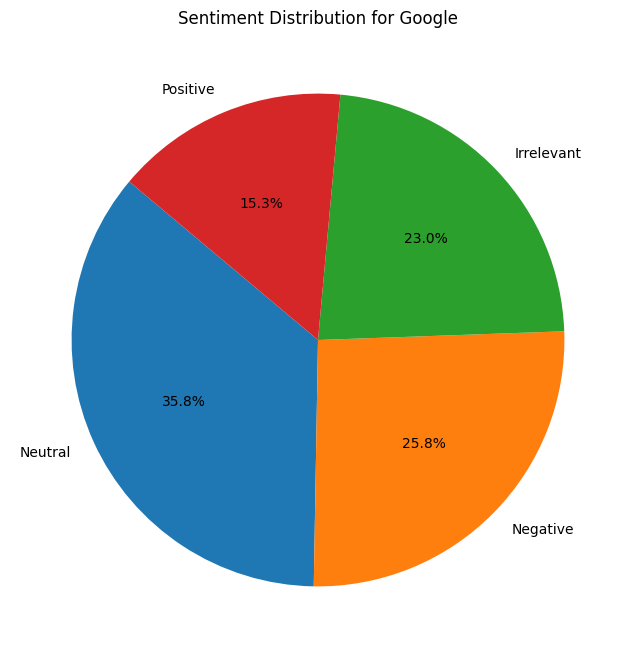

In [10]:
plot_pie_chart('Google')

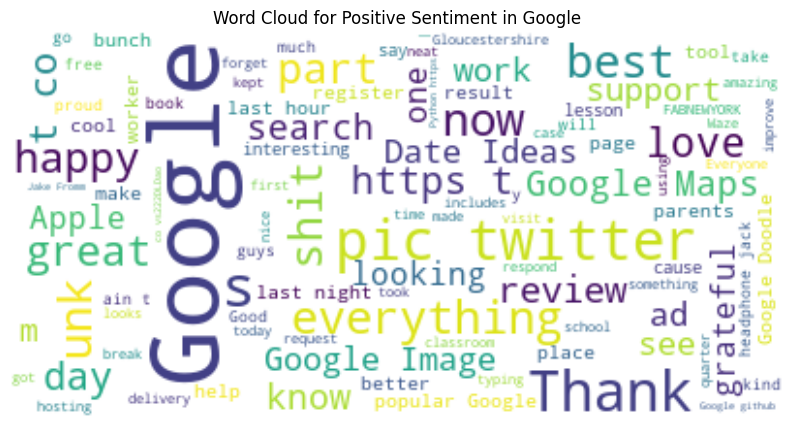

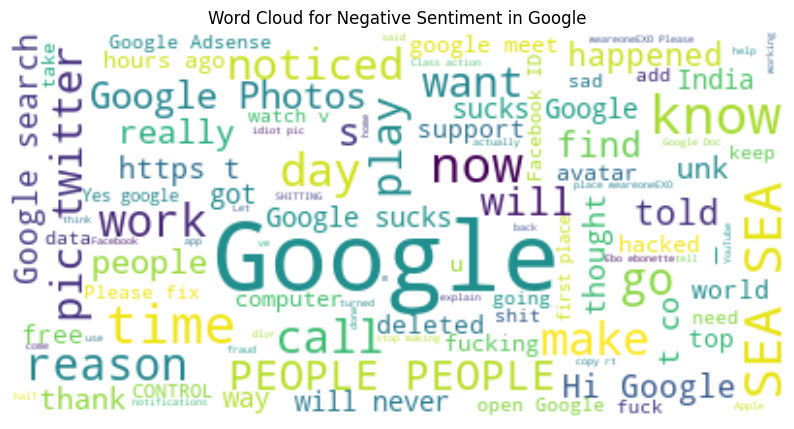

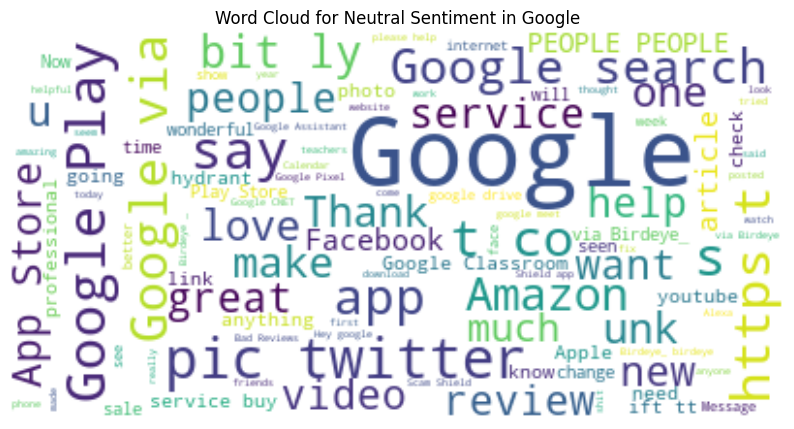

In [11]:
#Generate word clouds for 'Google'
generate_word_cloud('Google', 'Positive')
generate_word_cloud('Google', 'Negative')
generate_word_cloud('Google', 'Neutral')

## Visualize sentiment distribution for 'Facebook'

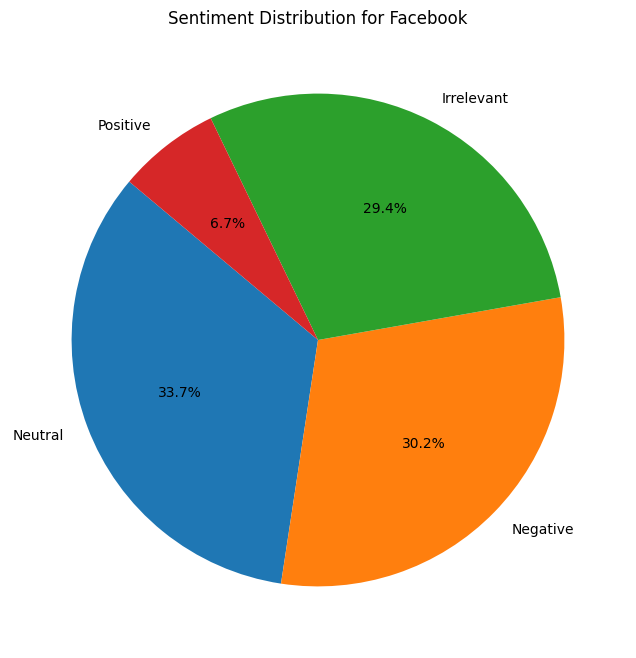

In [12]:
plot_pie_chart('Facebook')

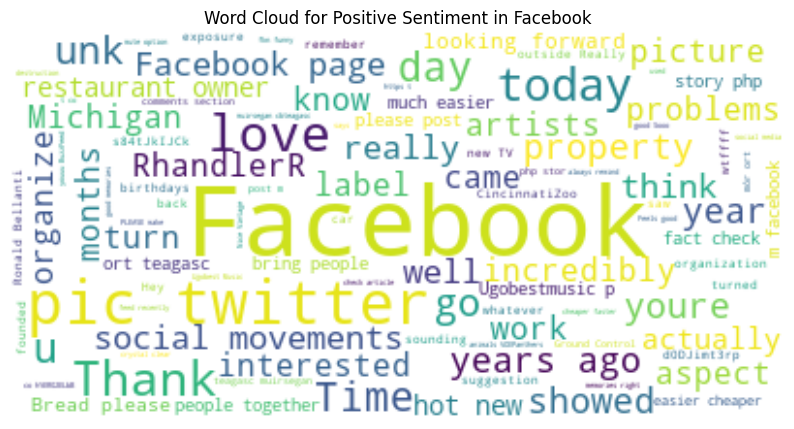

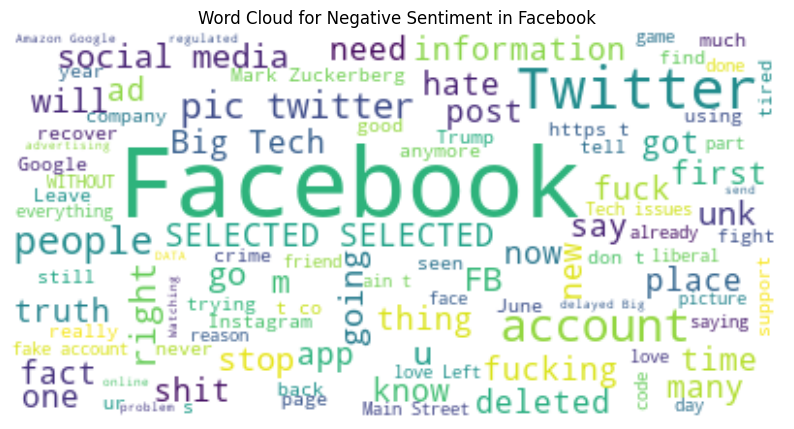

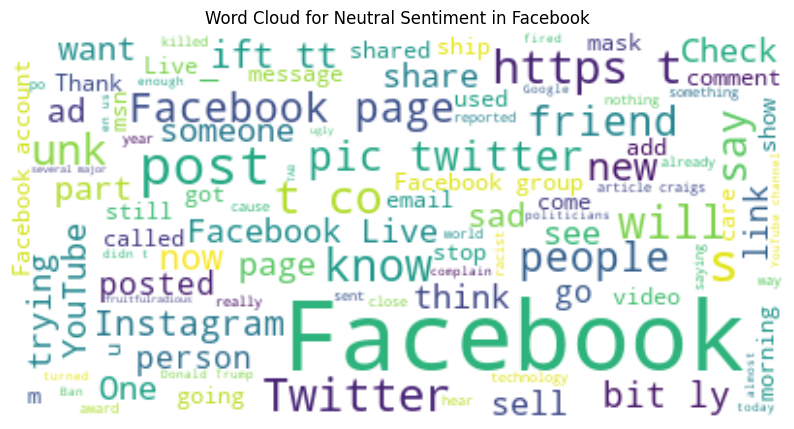

In [13]:
# Generate word clouds for 'Facebook'
generate_word_cloud('Facebook', 'Positive')
generate_word_cloud('Facebook', 'Negative')
generate_word_cloud('Facebook', 'Neutral')